In [1]:
# Obviously, import needed packages
# Hint: this time, you'll also need Seaborn!
import seaborn as sb
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Time for practicing Pandas operation using the penguins dataset you worked with last week in your Week 6 In-Module Exercise 

## KEY NOTE: Avoid "hardcoding" as much as possible!

In [3]:
df = pd.read_csv('penguins_size.csv')

df = df.rename(
    columns={
        'culmen_length_mm': 'beak_length_mm',
        'culmen_depth_mm': 'beak_depth_mm'
    }
)
df

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


#### FROM LAST WEEK, CAN COPY + PASTE:  Read in 'penguins_size.csv' using Pandas, remove NANs.

#### (1)  Print out the entries of penguins with a beak length greater than 36 mm

In [7]:
df_beak36 = df[df['beak_length_mm'] > 36].dropna()
df_beak36

,species,island,beak_length_mm,beak_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
145,Adelie,Dream,39.0,18.7,185.0,3650.0,MALE
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE


#### (2)  How many penguins are there in this dataset with a beak length greater than 36 mm?


In [9]:
print('# of Penguins:',len(df_beak36))
# Sanity check: 121 penguins

# of Penguins: 121


#### (3)  How many penguins have a beak length greater than 36 mm AND less than 40 mm?

In [11]:
print('# of Penguins with beak length between 36mm and 40mm:',
      len(df_beak36[df_beak36['beak_length_mm'] < 40]))


# Sanity check: 71 penguins

# of Penguins with beak length between 36mm and 40mm: 71


#### (4)  Create a new column in the dataframe called 'beaker ratio', which consists of the values of beak length divided by values of beak depth.

In [12]:
df['beaker_ratio'] = df['beak_length_mm'] / df['beak_depth_mm']
df['beaker_ratio']

0      2.090909
1      2.270115
2      2.238889
3           NaN
4      1.901554
         ...   
147    1.989130
148    2.022472
149    2.088398
150    2.105263
151    2.243243
Name: beaker_ratio, Length: 152, dtype: float64

#### (5)  Create a scatterplot of body mass vs. flipper length, using the beak length column to control color of scatter plots, and using a colormap of your choice
- it can be very insightful to control color based on values of another variable, in this case another penguin characteristic, yes?
<br><br>
- why don't you also change the colormap from the default? your choice of which new colormap to use

<Axes: title={'center': 'Penguin Body Mass vs. Flipper Length'}, xlabel='Body Mass (g)', ylabel='Flipper Length (mm)'>

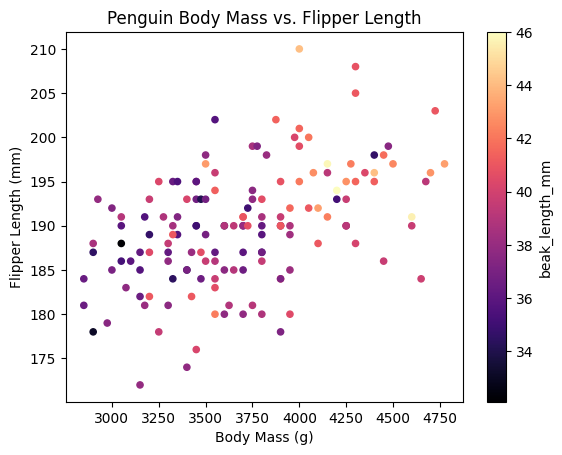

In [ ]:
df.plot(kind='scatter', 
    x='body_mass_g', 
    y='flipper_length_mm', 
    c='beak_length_mm', # Color
    colormap='magma', # Colormap
    title='Penguin Body Mass vs. Flipper Length',
    xlabel='Body Mass (g)',
    ylabel='Flipper Length (mm)',
    )

#### (6)  From your plot in (5), what do you notice about the penguins with shorter beak length?  

In [ ]:
# On average, it seems that the smaller a penguin is in terms of body mass, the shorter its beak length. 

#### (7) A single scatterplot is interesting, but there's value and convenience in a *scatterplot matrix*, especially in the EDA process.  Create one.
- Please use Seaborn

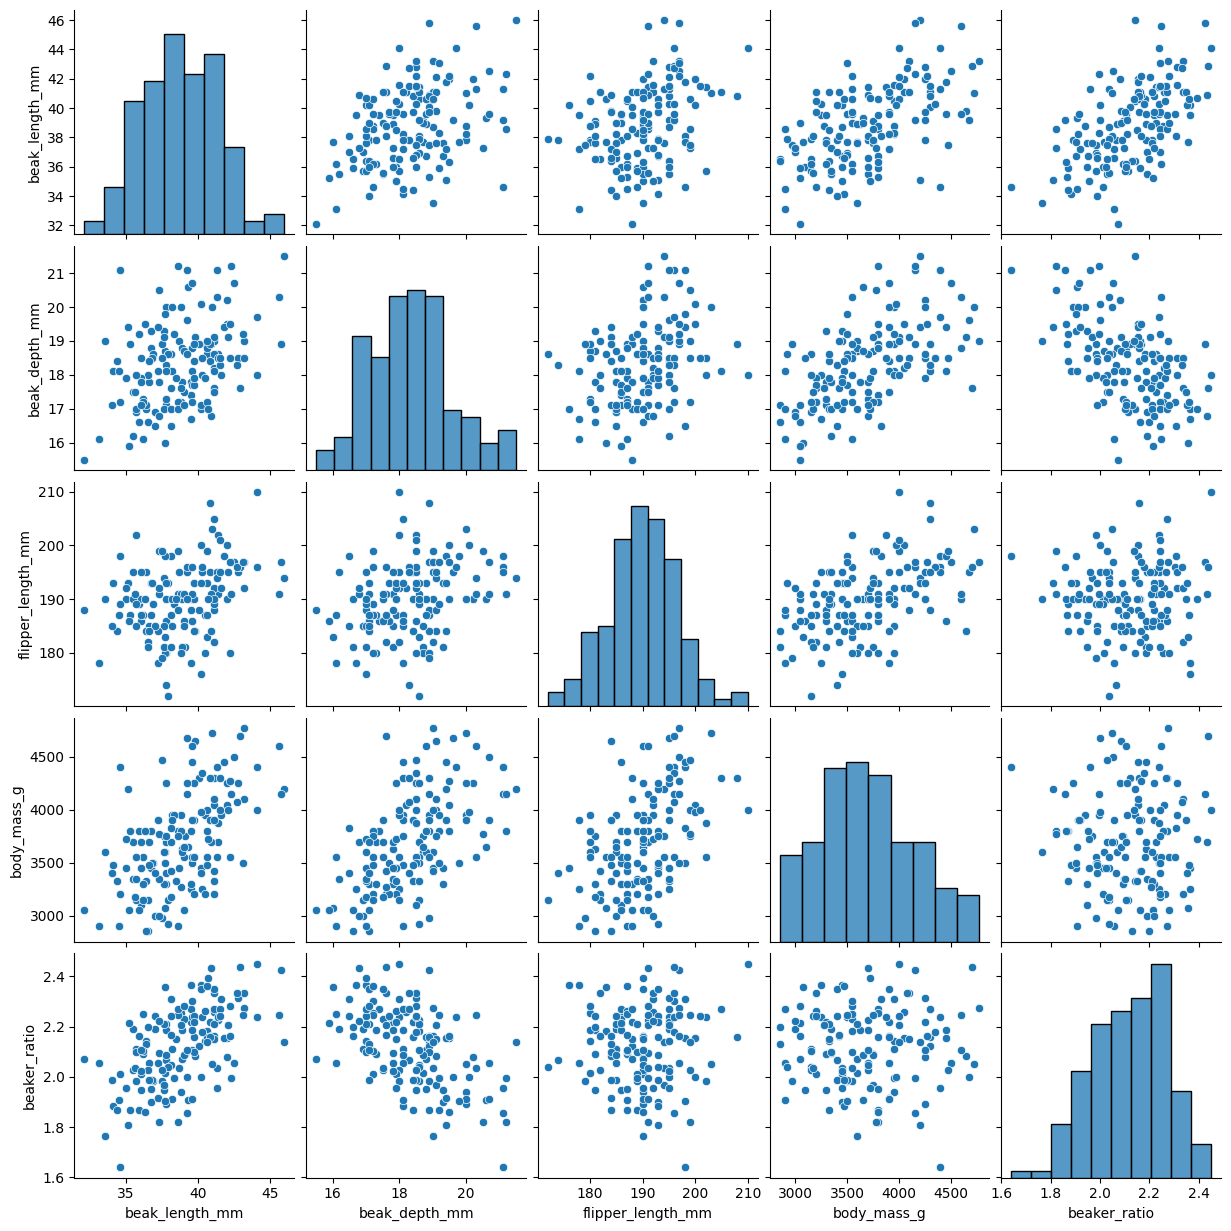

In [ ]:
# Scatter plot matrix
sb.pairplot(df)

#### (8) And now create a heatmap of CORRELATIONS
- Yes, there's only a few numerical columns, so this will be a small one!
- Please use Seaborn

<Axes: >

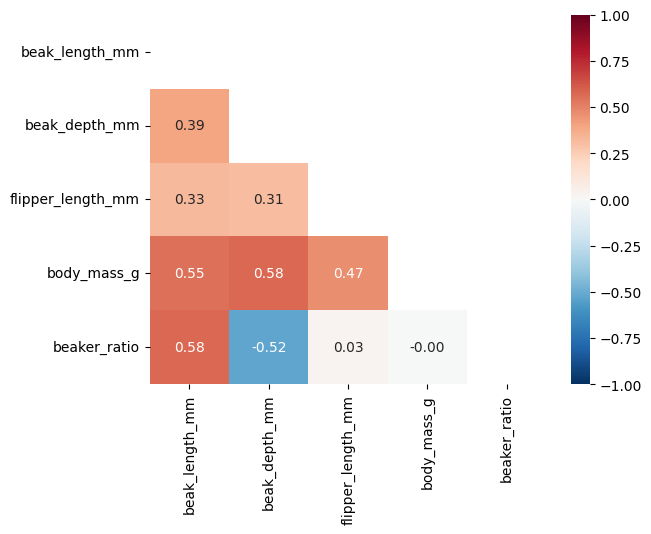

In [32]:
# Keep numerical columns
df2 = df[['beak_length_mm',
          'beak_depth_mm',
          'flipper_length_mm', 
          'body_mass_g',
          'beaker_ratio']]
 
# Create correlation matrix
penguins_corr = df2.corr()

# Create mask for upper 'triangle' of corr matrix (since it is redundant)
mask = np.triu(np.ones_like(penguins_corr, dtype=bool))

# Create heatmap
sb.heatmap(penguins_corr, mask=mask, cmap='RdBu_r', vmin=-1, vmax=1,
           annot=True, fmt= '.2f')

#### (9) Based on your heatmap, which two characteristics have the strongest correlation?

In [ ]:
# Beak depth and body mass, with a correlation coefficient of 0.58

#### (10) Looking back at your scatterplot matrix, comment on what you see in the scatterplot of these two characteristics that have the strongest correlation that you identified in (9) (i.e., anything you notice about the relationship from that scatterplot)

In [ ]:
# The scatter plot for beak depth and body mass shows a weak positive correlation, in that longer beak lengths generally coincide 
# with larger body masses. 